In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo

# Function to get player's position by name
def get_player_position(player_name):
    # Find the player by full name
    player_info = players.find_players_by_full_name(player_name)

    if not player_info:
        return "Player not found"  # Handle the case where the player is not found

    # Get the player's ID from the first result (assuming it's the correct player)
    player_id = player_info[0]['id']

    # Use the player ID to get more information about the player, including their position
    player_info_endpoint = commonplayerinfo.CommonPlayerInfo(player_id=player_id)
    player_info_data = player_info_endpoint.get_data_frames()[0]

    # Extract and return the player's position
    player_position = player_info_data['POSITION'].values[0]

    return player_position

In [27]:
# Load the Excel file into a dictionary of DataFrames
excel_file_path = "C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\stats\\stats 2000-2024.xlsx"  # Replace with your file path
all_sheets = pd.read_excel(excel_file_path, sheet_name=None)

# Create DataFrames for each year from 2000 to 2024
for year in range(2000, 2025):
    year_str = str(year)
    df_name = f'stats_{year_str}'
    df = all_sheets[year_str]
    df["season"] = year_str
    globals()[df_name] = df
# Now, you have DataFrames like stats_2000, stats_2001, ..., stats_2024
# Next, merge all stats into one dataframe
all_dataframes = []

# Concatenate the DataFrames
for year in range(2000, 2025):
    year_str = str(year)
    df_name = f'stats_{year_str}'
    
    # Check if the DataFrame exists
    if df_name in globals():
        all_dataframes.append(globals()[df_name])


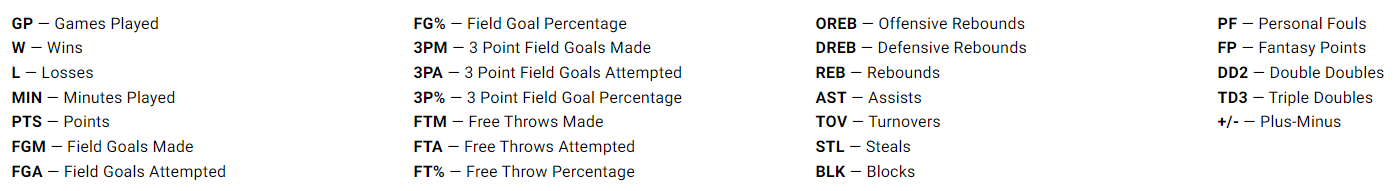

In [28]:
import pandas as pd
import os

# Initialize an empty DataFrame to store the concatenated data
stats = pd.DataFrame()

# Directory path containing the CSV files
directory_path = "C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\stats\\"

# Iterate through the years (2000 to 2024)
for year in range(2000, 2025):
    # Construct the file path for the CSV file
    file_path = os.path.join(directory_path, f"stats_{year}.csv")

    # Check if the file exists before attempting to read it
    if os.path.exists(file_path):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Drop rows with missing values (NaN)
        df.dropna(inplace=True)

        # Concatenate the current DataFrame with the existing 'stats' DataFrame
        stats = pd.concat([stats, df], ignore_index=True)
stats.to_csv("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\stats\\stats.csv")

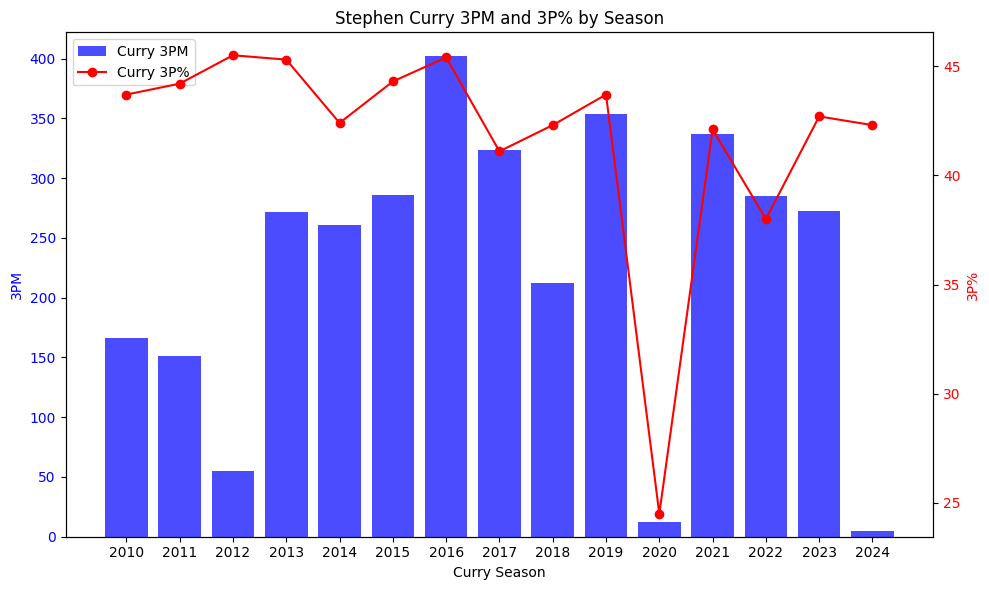

In [29]:
# Here we plot a 3 point made with 3 point percentage of Stephen Curry
curry = stats[stats["PLAYER"]=="Stephen Curry"]
curry_season = curry["season"]
curry_3PM = curry["3PM"]
curry_3Ppercent = curry["3P%"]


fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the bar chart for curry_3PM
ax1.bar(curry_season, curry_3PM, color='b', alpha=0.7, label='Curry 3PM')
ax1.set_xlabel('Curry Season')
ax1.set_ylabel('3PM', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(curry_season)

# Create a second y-axis for curry_3Ppercent
ax2 = ax1.twinx()
ax2.plot(curry_season, curry_3Ppercent, color='r', marker='o', label='Curry 3P%')
ax2.set_ylabel('3P%', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title
plt.title('Stephen Curry 3PM and 3P% by Season')

# Show the plot
plt.tight_layout()
plt.show()